[ 2.          2.68965517  5.37931034  8.06896552 10.75862069 13.44827586
 16.13793103 18.82758621 21.51724138 24.20689655 26.89655172 29.5862069
 32.27586207 34.96551724 37.65517241 40.34482759 43.03448276 45.72413793
 48.4137931  51.10344828 53.79310345 56.48275862 59.17241379 61.86206897
 64.55172414 67.24137931 69.93103448 72.62068966 75.31034483 78.        ]
[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56
 58 60 62 64 66 68]
[0.01       0.0137     0.01522709 0.01882931 0.02163103 0.02387241
 0.02570627 0.02723448 0.02852759 0.02963596 0.03059655 0.03143707
 0.0321787  0.03283793 0.03342777 0.03395862 0.03443892 0.03487555
 0.03527421 0.03563966 0.03597586 0.03628621 0.03657356 0.03684039
 0.03708882 0.03732069 0.0375376  0.03774095 0.03793197 0.03811176]


c:\Users\whdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


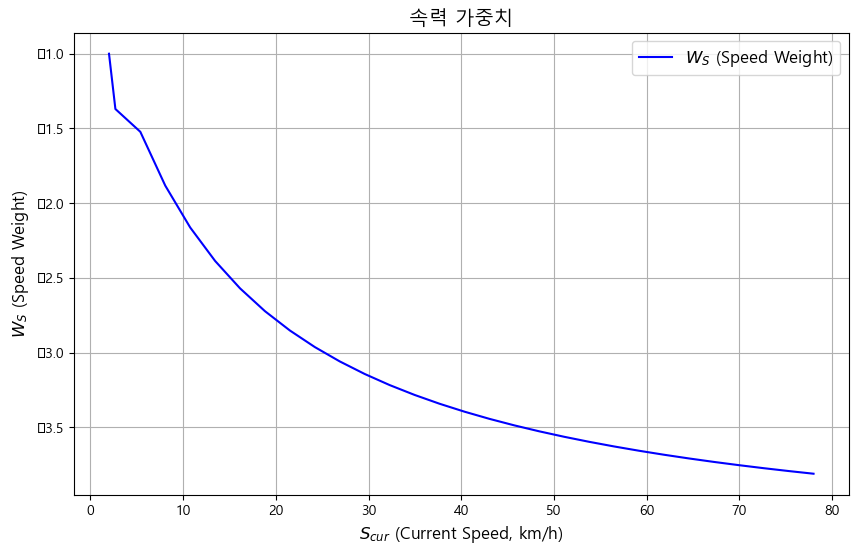

In [2]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import platform
from matplotlib import font_manager, rc # type: ignore

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
W_base_S = 0.0037
F_S = 0.3
F_change = 0.03
W_min = 0.01
W_max = 0.10

S_prev = np.arange(10, 70, 2)
S_cur = np.clip(S_prev + np.linspace(-10, 10, len(S_prev)), 2, None)
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 1)


print(S_cur)
print(S_prev)

W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum((S_cur - S_avg) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * F_change, 0.02)
    ),
    W_min, W_max
)

print(W_S)

W_S = W_S * -100

plt.figure(figsize=(10, 6))
plt.plot(S_cur, W_S, label="$W_S$ (Speed Weight)", color="blue")
plt.title("속력 가중치", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


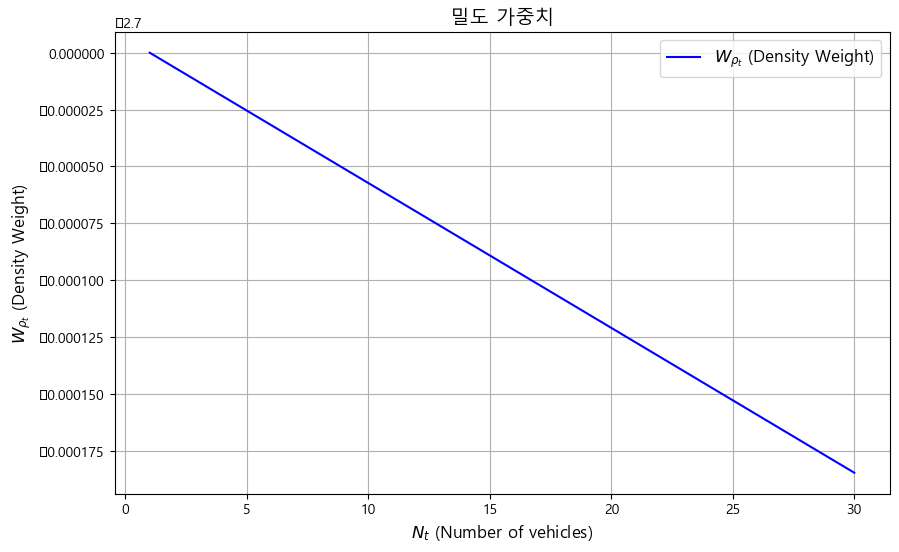

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

np.set_printoptions(suppress=True, precision=4) 

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_rho = 0.027  # 기본 밀도 가중치
F_rho = 0.001  # 민감도 조정 계수
W_min = 0.01  # Minimum limit for W_rho_t
W_max = 0.10  # Maximum limit for W_rho_t

# Density values
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density
rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)  # Average density

# Calculate W_rho_t
W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_rho_t = W_rho_t * -100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


[ -618.9917  -622.7767  -710.1859  -714.006   -761.2663  -843.0432
  -911.5627  -969.9433 -1020.3994 -1064.546  -1103.5881 -1138.443
 -1174.7386 -1186.3855 -1194.2827 -1231.371  -1290.2512 -1348.5528
 -1406.4308 -1436.1726 -1453.0764 -1469.1779 -1484.5643 -1499.3105
 -1513.4813 -1527.1333 -1540.3155 -1553.0713 -1565.4386 -1577.4513]


C:\Users\whdgu\AppData\Local\Temp\ipykernel_12380\453962621.py:27: RuntimeWarning: divide by zero encountered in divide
  F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed


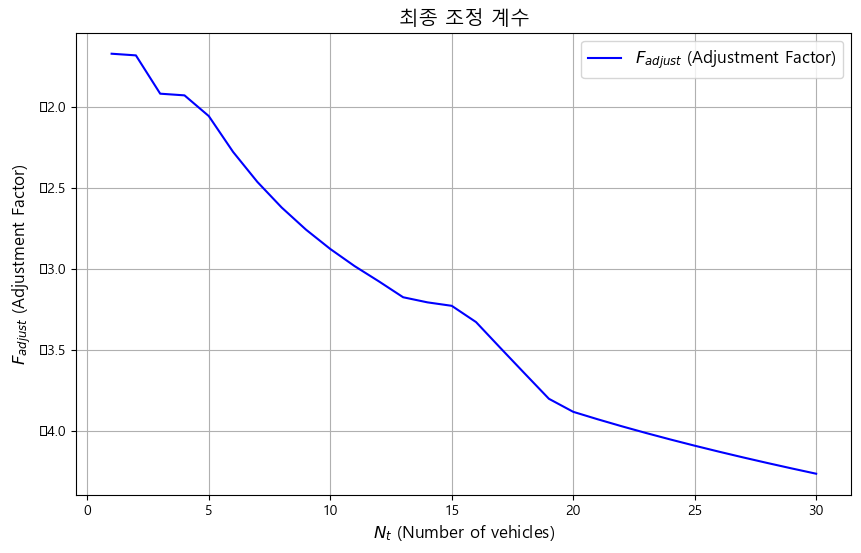

[-1.673  -1.6832 -1.9194 -1.9297 -2.0575 -2.2785 -2.4637 -2.6215 -2.7578
 -2.8772 -2.9827 -3.0769 -3.175  -3.2064 -3.2278 -3.328  -3.4872 -3.6447
 -3.8012 -3.8815 -3.9272 -3.9708 -4.0123 -4.0522 -4.0905 -4.1274 -4.163
 -4.1975 -4.2309 -4.2634]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5.]


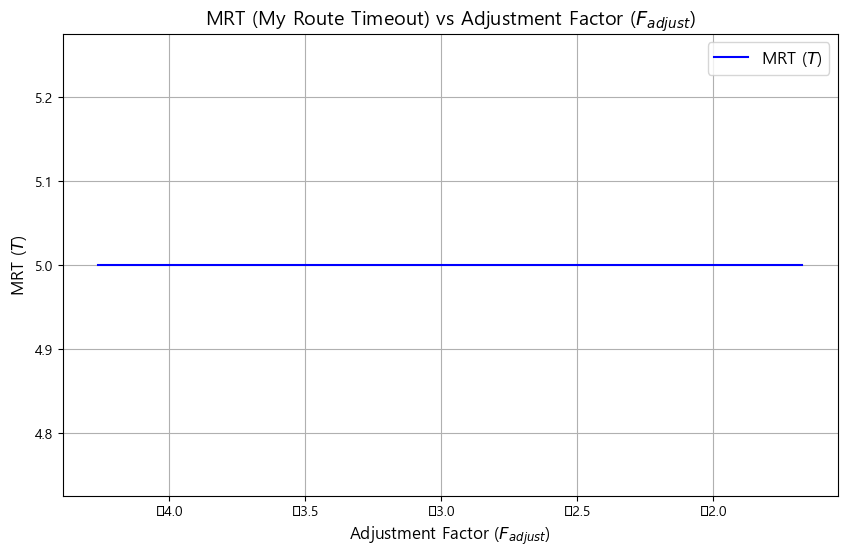

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters for MRT calculation
T_min = 5.0  # Minimum MRT value
T_max = 300.0  # Maximum MRT value
T_base = 170.0  # Base MRT value


# Parameters and previously calculated values
R = 0.8  # Radius
N_t = np.arange(1, 31)  # Vehicle count
rho_t = N_t / (np.pi * R**2)  # Density
S_prev = np.arange(10, 70, 2)  # Previous speeds
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 0)  # Speed change ratio

# Parameters for weights
W_base_rho = 0.027
W_base_S = 0.0037
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed
F_change = 0.03

# Calculate W_rho_t and W_S
W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum((S_cur - S_avg) * F_S, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)



# Calculate F_rho_t
F_rho_t = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))

W_S = W_S * -50
F_rho_t = F_rho_t * -50

# Calculate F_inter
F_inter = 1.0 + (W_rho_t - W_S) * 0.05

# Calculate F_adjust
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

T_base_del = 370.0  # Base value for T_del (Delete Period)
T_max_del = 500.0  # Maximum value for T_del

# Use previously calculated F_adjust
# F_adjust is assumed to be computed from the prior steps

# Calculate DPC (T_del)
T_del = np.minimum(T_max_del, T_base_del * F_adjust)
print(T_del)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_adjust, label="$F_{adjust}$ (Adjustment Factor)", color="blue")
plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

print(F_adjust)

T = np.maximum(T_min, np.minimum(T_max, T_base * F_adjust))
print(T)

# Plot MRT (T) vs F_adjust
plt.figure(figsize=(10, 6))
plt.plot(F_adjust, T, label="MRT ($T$)", color="blue")
plt.title("MRT (My Route Timeout) vs Adjustment Factor ($F_{adjust}$)", fontsize=14)
plt.xlabel("Adjustment Factor ($F_{adjust}$)", fontsize=12)
plt.ylabel("MRT ($T$)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


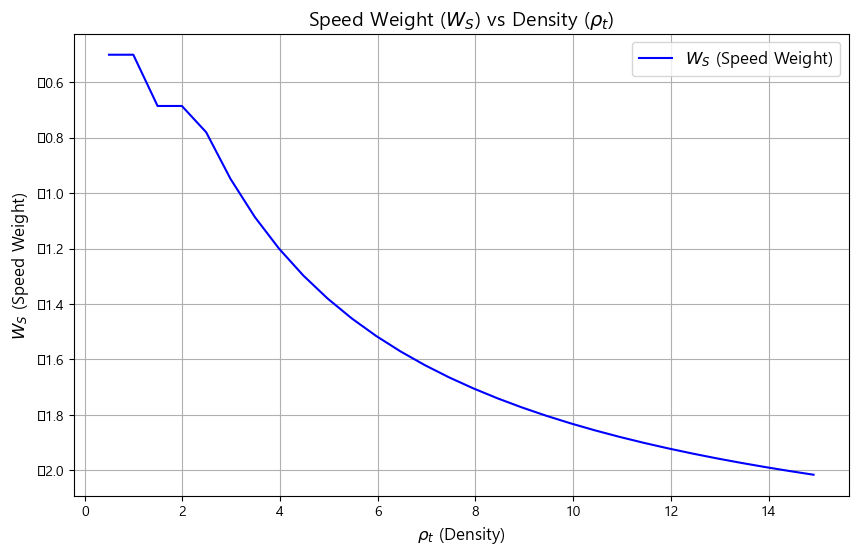

In [5]:
# Plot W_S (Speed Weight) vs rho_t (Density)
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_S[:len(rho_t)], label="$W_S$ (Speed Weight)", color="blue")
plt.title("Speed Weight ($W_S$) vs Density ($\\rho_t$)", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


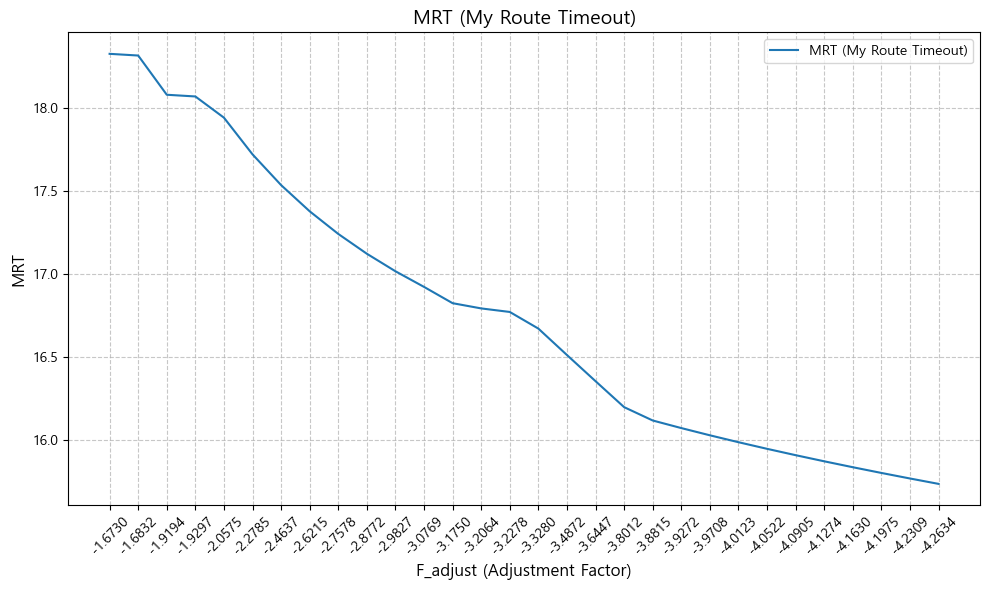

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc


if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')


np.set_printoptions(suppress=True, precision=4)

#F_adjust = F_adjust * 0.5

# Given data
data = F_adjust + 20

# X-axis labels
x_labels = F_adjust

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


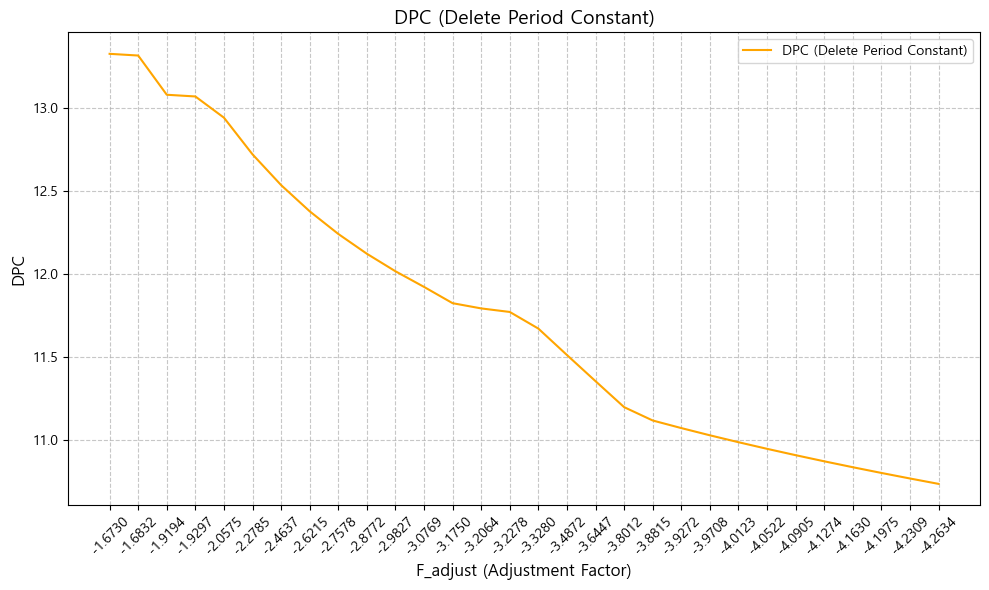

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Second dataset (Y-axis data)
data2 = F_adjust + 15

# Custom X-axis data (labels for the X-axis)
x_labels = F_adjust 

# Plotting the second dataset
plt.figure(figsize=(10, 6))
plt.plot(data2, marker=None, linestyle='-', color='orange', label='DPC (Delete Period Constant)')

# Set custom X-axis labels
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()
